Importing std libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import decomposition

Loading Features

0.5756159772362408
0.20603000234112342


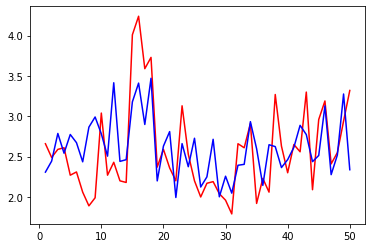

In [2]:
features = np.loadtxt("D:\VS\MyMachineGotEyes\Facial Attractiveness\Output files\\features_ALL.txt", delimiter=",")
#features = preprocessin.scale(features)
features_train = features[0: -50]
features_test = features[-50:]

pca = decomposition.PCA(n_components=20)
pca.fit(features_train)
features_train = pca.transform(features_train)
features_test = pca.transform(features_test)

ratings = np.loadtxt("D:\VS\MyMachineGotEyes\Facial Attractiveness\data\\ratings.txt", delimiter=",")
ratings_train = ratings[0:-50]
ratings_test = ratings[-50:]

regr = linear_model.LinearRegression()
regr.fit(features_train, ratings_train)
ratings_predict = regr.predict(features_test)
corr = np.corrcoef(ratings_predict, ratings_test)[0, 1]
print(corr)

residue = np.mean((ratings_predict-ratings_test)**2)
print(residue)

rangeArray = np.arange(1, 51)
plt.plot(rangeArray, ratings_test, 'r', rangeArray, ratings_predict, 'b')
plt.show()